# <u> ASTR 5490: Homework 2 (Time-Domain Astronomy / Fourier Transforms) </u>

# 1) Experimenting with Fourier Components
## $S(t) = C_0 + C_1\cos\left(1\frac{2\pi(t-t_0)}{P}\right) + C_2\cos\left(2\frac{2\pi(t-t_0)}{P}\right) + C_3\cos\left(3\frac{2\pi(t-t_0)}{P}\right) + ...$

In [1]:
# Import relevant modules/packages
import numpy as np
import matplotlib.pyplot as plt
from astropy import units as u
from astropy import constants as const
from astropy.timeseries import LombScargle

In [90]:
# Class to calculate Fourier components
class Fourier:
    
    # Initialize the instance of this Class with the following properties
    def __init__(self,c,start,end,period=1.0,t0=0.0,parity='both'):
        # Inputs
        #    c: list of coefficients in front of Fourier components
        #    start: multiple of period to set as beginning of time list
        #    end: multiple of period to set as end of time list
        #    period: period of signal (default is 1)
        #    t0: reference time for signal (default is 0)
        #    parity: parameter to choose to plot even, odd, or even&odd ()'both')terms
        
        # Define list of coefficients
        self.c = c
        
        # Define parity
        self.parity = parity
        
        # Calculate renormalization factor
        self.R = np.sum(c)
        
        # Define period and reference time
        self.period = period
        self.t0 = t0
        
        # Make a list of times to evaluate signal at (2 periods)
        self.t = np.linspace(start*period,end*period,100)
        
        # Calculate phase of Fourier components
        self.phase = [(t-self.t0)/self.period for t in self.t]

    # Function to calcuate signal vs. time
    def FourierSignal(self):
        
        # Define empty list of signal amplitude values
        S = []
        
        # Define multiple within cosine argument depending on which terms you're interested in
        if self.parity == 'even':
            
            # Makes evenly spaced list of even numbers
            multiples = np.arange(2,2*len(c),2)      
                
        elif self.parity == 'odd':
            
            # Makes evenly spaced list of odd numbers
            multiples = np.arange(1,2*len(c)+1,2)
            
        elif self.parity == 'both':
            
            # Make list of numbers from 0 to length of coefficient list
            multiples = np.arange(1,len(c),1)
            
        # Calculate signal value for each phase value
        for phi in self.phase:
            
            # Define C_0 as first term (assumed to be first term of user-entered coefficient array)
            terms = self.c[0]
            
            # Add all Fourier terms you're interested in
            for i in range(1,len(c)):
                terms += self.c[i]*np.cos(multiples[i-1]*2*np.pi*phi)
                
            # Append normalized signal value to signal array
            S.append(1/self.R*terms)

        return(self.c,self.phase,self.t,S)
    
    # Function to plot signal vs. time
    def FourierPlotter(self,xaxis,linestyle='solid',legend=True):
        
        c,phi,t,S = self.FourierSignal()
        
        # Plot signal vs. time
        ax = plt.subplot(111)
        
        # Plot S vs. t
        label = r'First {0} {1} coeff.'.format(len(c),self.parity)
        
        if xaxis == 'phase':
            ax.plot(phi,S,label=label,linestyle=linestyle)
            ax.set_xlabel('Phase',fontsize=14)
        elif xaxis == 'time':
            ax.plot(t,S,label=label,linestyle=linestyle)
            ax.set_xlabel('Time (period)',fontsize=14)

        # Add plot labels
        ax.axhline(0,color='black',linestyle='dashed')
        
        ax.set_ylabel('S(t)',fontsize=14)
        
        if legend == True:
            ax.legend(loc='center left',bbox_to_anchor=(1, 0.5),fontsize=12)
            
        ax.set_title('Signal vs. Time',fontsize=18)

In [4]:
# Make list of linestyles
linsty = ['solid','dashed','dotted','dashdot']

/usr/local/Anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:73: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
/usr/local/Anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:73: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
/usr/local/Anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:73: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier i

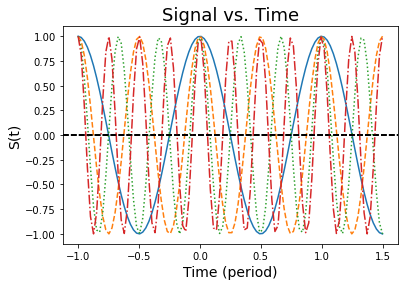

In [5]:
# Make a list of Fourier coefficients so they're all 0
c = np.zeros(5)

# Loop over each coefficient
for i in range(1,len(c)):
    
    # Set different cofficient equal to 1
    c[i] = 1

    # Create instance of class for this set of coefficients and plot form of Fourier component
    fourier = Fourier(c,start=-1,end=1.5)
    fourier.FourierPlotter(xaxis='time',linestyle=linsty[i-1],legend=False)
    
    # Reset particular coefficient to 1 for next loop
    c[i] = 0

## 1a) Let $C_1=C_2=1$ and $C_{>2}=0$

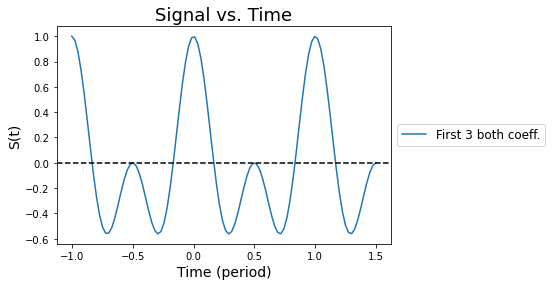

In [6]:
# Make a list of Fourier coefficients
c = [0,1,1]

# Create instance of class for this set of coefficients 
fourierOddEven = Fourier(c,start=-1,end=1.5)

# Plot form of Fourier components
fourierOddEven.FourierPlotter(xaxis='time')

### If we compare the graph from 1a to the graph with $C_1$ through $C_4$, we see that adding the first odd and even components reduces the amplitude of the even peaks (second, fourth, part of sixth) where the individual functions have opposing maxima/minima. The odd peaks (first, third, fifth) remain the same since they share a maxima there.

## 1b) First four even components with equal power

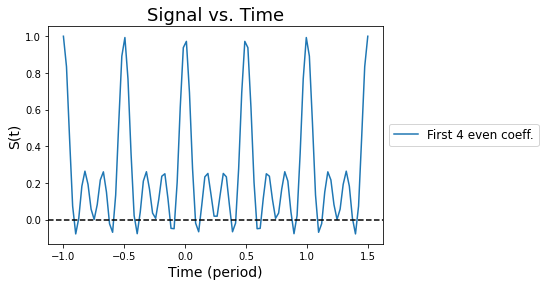

In [7]:
# Make a list of Fourier coefficients of equal power
c = np.ones(4)

# Create instance of class for set first four even coefficients 
fourierEven = Fourier(c,start=-1,end=1.5,parity='even')

# Plot form of Fourier components
fourierEven.FourierPlotter(xaxis='time')

## 1b) Adding increasingly more even components with equal power

In [8]:
# Define array with different numbers of coefficients
numComponents = [10,20]

/usr/local/Anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:73: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


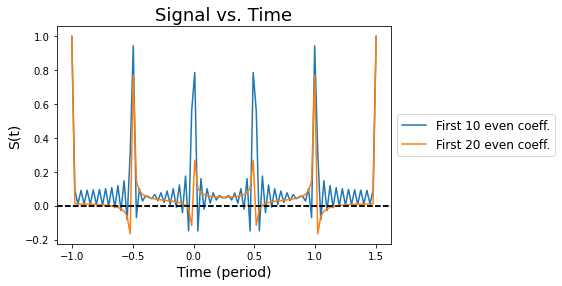

In [9]:
# Plot Fourier series with different numbers of terms
for num in numComponents:
    
    # Make list of ones
    c = np.ones(num)
    
    # Create instance of Fourier class and plot Fourier series
    instance = Fourier(c,start=-1,end=1.5,parity='even')
    instance.FourierPlotter(xaxis='time')

### Adding increasingly more even components with equal power decreases the amplitude of all the oscillations and makes the oscillations narrower

## 1c) First four even components with successive components at half power

In [10]:
# Function to make a list of a descending geometric series
def DescendingGeometric(length):
    
    # Make list of coefficients that are all 1
    c = np.ones(length)
    
    # Multiply each component by another factor of 1/2
    for i in range(1,len(c)):
        c[i] *= .5/i
        
    return(c)

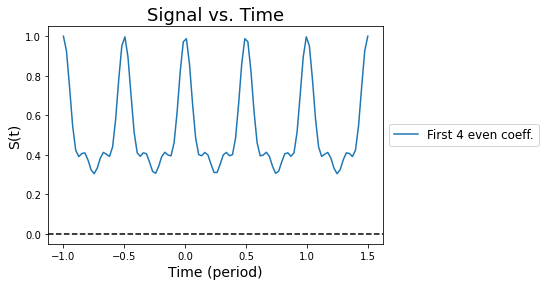

In [11]:
# Make a list of first four even Fourier coefficients with successively half-powers
c = DescendingGeometric(4)
    
# Create instance of class for set of first 4 even coefficients 
fourierGeometric = Fourier(c,start=-1,end=1.5,parity = 'even')

# Plot form of Fourier components
fourierGeometric.FourierPlotter(xaxis='time')

## 1b) Adding increasingly more even components with half power

/usr/local/Anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:73: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


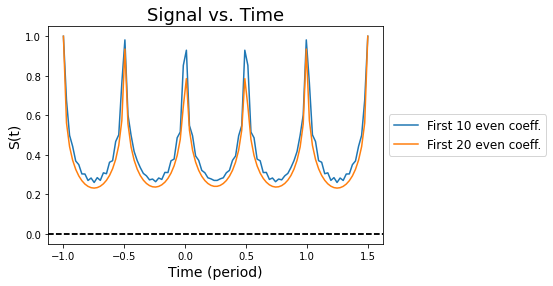

In [12]:
# Plot Fourier series with different numbers of terms
for num in numComponents:
    
    # Make a list of even Fourier coefficients with successively half-powers
    c = DescendingGeometric(num)
    
    # Create instance of Fourier class and plot Fourier series
    instance = Fourier(c,start=-1,end=1.5,parity='even')
    instance.FourierPlotter(xaxis='time')

### Adding more components smooths this function out and makes the peaks narrower. Another demonstration of how adding more Fourier components produced a smoother wave.

## 1d) First Four Odd Terms with Equal Power

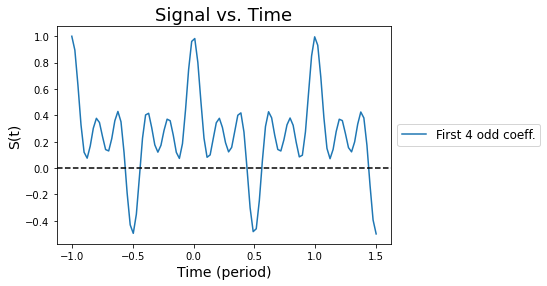

In [13]:
# Make a list of Fourier coefficients of equal power
c = np.ones(4)

# Create instance of class for set first four odd coefficients 
fourierEven = Fourier(c,start=-1,end=1.5,parity='odd')

# Plot form of Fourier components
fourierEven.FourierPlotter(xaxis='time')

## 1d) Adding increasingly more odd components with half power

/usr/local/Anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:73: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


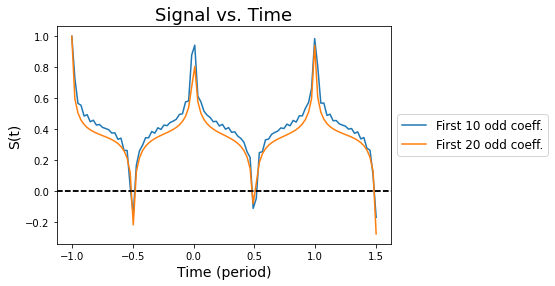

In [14]:
# Plot Fourier series with different numbers of terms
for num in numComponents:
    
    # Make a list of even Fourier coefficients with successively half-powers
    c = DescendingGeometric(num)
    
    # Create instance of Fourier class and plot Fourier series
    instance = Fourier(c,start=-1,end=1.5,parity='odd')
    instance.FourierPlotter(xaxis='time')

## 1e) Qualitatively Reproducing Astronomical Periodic Phenomena

### Light curve of a contact binary star
### Recommendation: $C_0=1$ and first even cosine term ($C_2=1$)

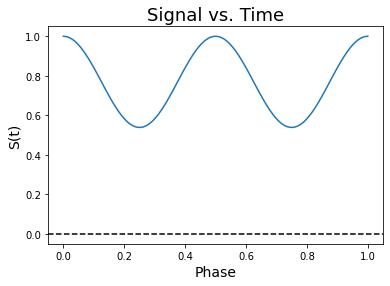

In [15]:
c = [1,0,.3]
instance = Fourier(c,start=0,end=1,parity='both')
instance.FourierPlotter(xaxis='phase',legend=False)

### Velocity curve of a planet in an e=0 orbit
### Recommendation: $C_0$ and first odd cosine term ($C_1=1$)

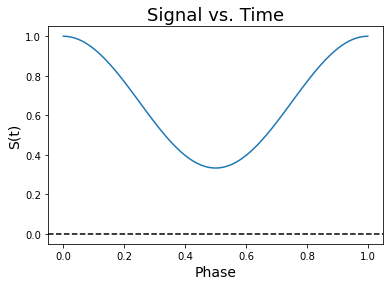

In [16]:
c = [1,.5]
instance = Fourier(c,start=0,end=1,parity='both')
instance.FourierPlotter(xaxis='phase',legend=False)

### Velocity curve of a planet in an e>>0 orbit
### Recommendation: $C_0$ and first three cosine terms ($C_1=1, C_2=-.5,C_3=.13$)

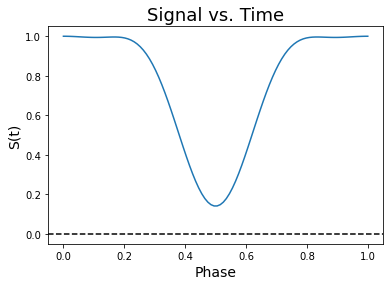

In [17]:
c = [2,1,-.5,.13]
instance = Fourier(c,start=0,end=1,parity='both')
instance.FourierPlotter(xaxis='phase',legend=False)

### Light curve of an eclipsing binary star system with two stars of same temp.
### Recommendation: $C_0=2$ and first 2 odd & even cosine terms ($C_1=-1,C_2=3,C_3=3,C_4=1$)

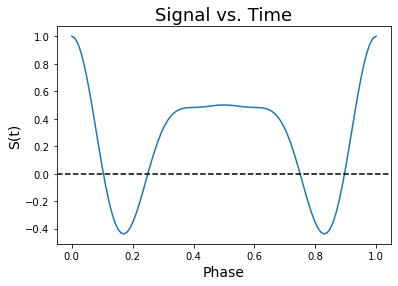

In [18]:
c = [2,-1,3,3,1]
instance = Fourier(c,start=0,end=1,parity='both')
instance.FourierPlotter(xaxis='phase',legend=False)

### Light curve of a planet transit (top hat)
### Recommendation: $C_0=2$ and first 2 odd & even cosine terms with successivley half power ($C_1=1,C_2=0.5,C_3=.25,C_4=.125$)

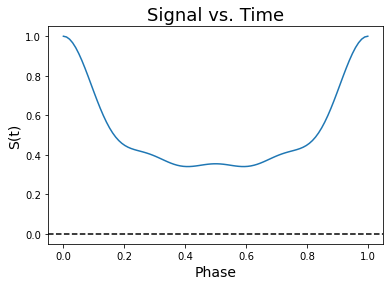

In [91]:
c = [2,1,.5,.25,.125]
instance = Fourier(c,start=0,end=1,parity='both')
instance.FourierPlotter(xaxis='phase',legend=False)

## 1f) Plotting Cn vs n for transiting planet profile

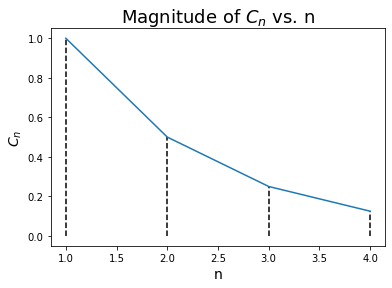

In [92]:
# Plotting Cn vs n
n = [1,2,3,4]
plt.plot(n,c[1:5])
plt.title(r'Magnitude of $C_n$ vs. n',fontsize=18)
plt.xlabel('n',fontsize=14)
plt.ylabel(r'$C_n$',fontsize=14)

# Plot vertical lines up to different Cn values
for value in n:
    plt.vlines(value,0,c[value],linestyle='dashed')

### Light curve of a pulsating star
### Recommendation: $C_0=6$ and first three odd cosine terms and first even cosine term ($C_1=0.4,C_2=2,C_3=-.7,C_5=0.2$)

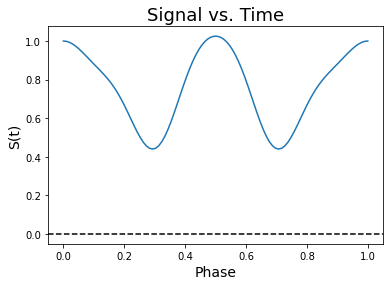

In [119]:
c = [6,.4,2,-.7,0,0.2]
instance = Fourier(c,start=0,end=1,parity='both')
instance.FourierPlotter(xaxis='phase',legend=False)

### This looks like an extra half-period of the picture in the homework. Adding more components would surely give you a better match, but for the first few terms this is a good approximation.

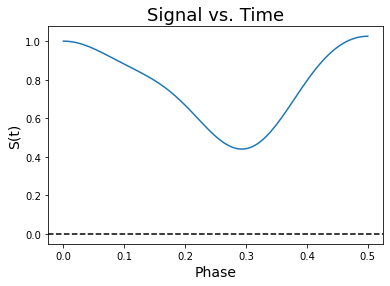

In [122]:
c = [6,.4,2,-.7,0,0.2]
instance = Fourier(c,start=0,end=0.5,parity='both')
instance.FourierPlotter(xaxis='phase',legend=False)

# 2) Real Contact Binary Star Light Curve

## 2a) Flux vs. Date

In [93]:
# Function for plotting light curves from text file
def LightCurve(filename,objectname,numPoints,period=None,plot=True,xaxis='Time',curve='Flux'):
    # Inputs:
    #     filename: file path or file name (if file in same folder as notebook)
    #     objectname: name of object you're plotting curve of
    #     numPoints: number of data points you want to use from the file
    #     period: period of plot feature (only used if xaxis='Phase' to fold the data)
    #     plot: boolean to decide whether to plot the data (True) or not (False)
    #     xaxis: decide which x parameter to calculate/plot ('Time or Phase')
    #     curve: string that indicates y parameter being plotted (used in axis label)
    # Returns:
    #     xdata: array with data from x-axis
    #     fluxes: array with associated y-axis data
    #     errors: measurement errors read from text file
    
    # Extract time, flux, and error data from text file
    times,fluxes,errors = np.loadtxt(filename,skiprows=1,unpack=True,usecols=[0,1,2])
    
    # Decide what times array to make
    if numPoints == None:
        times = [time - times[0] for time in times]
    else:
        times = [time - times[0] for time in times[:numPoints]]
        fluxes = fluxes[:numPoints]       
    
    # Define list of data to plot on x-axis (time or phase)
    xdata = []
    
    if plot == True:
        # Initialize axis figure and axis
        fig = plt.figure()
        ax = fig.add_subplot(111)

        # Decide what x-axis should be
        if xaxis == 'Time':
            xlabel = 'Time (days)'

            # Plot flux vs time
            ax.plot(times,fluxes)

            xdata = times

        elif xaxis == 'Phase':
            xlabel = 'Phase'

            # Calculate phase from time data
            phases = [(time%period)/period for time in times]

            # Make a scatter plot of flux vs. phase
            ax.scatter(phases,fluxes,label='Period = {0:.3f} days'.format(period))

            xdata = phases

        # Add plot features
        ax.set_xlabel(xlabel,fontsize=14)
        ax.set_ylabel('{0}'.format(curve),fontsize=14)
        ax.set_title('{0} vs. {1} for {2}'.format(curve,xaxis,objectname),fontsize=18)
        ax.legend()
    else:
        # Decide what x-axis should be
        if xaxis == 'Time':
            xdata = times
        elif xaxis == 'Phase':
            # Calculate phase from time data
            phases = [(time%period)/period for time in times]
            xdata = phases
    
    return(xdata,fluxes,errors)

No handles with labels found to put in legend.


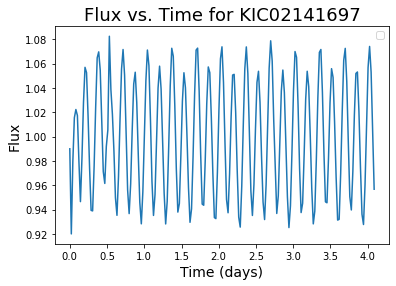

In [94]:
x,y,e = LightCurve('KIC02141697_LC_all.dat','KIC02141697',200)

### The raw light curve has very frequeny peaks and dips indicating two nearly equally massive bodies orbiting around one another. They block each other's light during each cycle.
### It looks like only 1 Fourier component might be required to match it because it looks like a single cosine function, with a short period (high frequency).

## 2b) Make Power Spectrum with astropy.timeseries.LombScargle for entire Kepler Quarter 2 dataset (from SIMBAD: period = 0.331 days)

In [5]:
# Function to generate power spectrum from a flux vs. time dataset
def LS(filename,objectname,minP,maxP,numIntervals,i,trueP=None,days=None):

    # Extract time, flux, and error data from text file
    times,fluxes,errors = np.loadtxt(filename,skiprows=1,unpack=True,usecols=[0,1,2])
    
    if days != None:
        increment = days*50 # Approximately 50 data points per day
        times,fluxes,errors = times[:increment],fluxes[:increment],errors[:increment]
    
    # Define range of frequencies to search over
    minfreq = 1./maxP
    maxfreq = 1./minP

    # Make list of frequencies within the range
    frequency = np.linspace(minfreq,maxfreq,numIntervals)

    # Use LombScargle method to calculate power as a function of those frequencies
    power = LombScargle(times,fluxes,errors,nterms=i).power(frequency)
    
    # Find maximum power and frequency/period of maximum power
    maxp = np.max(power) 
    maxind = np.argmax(power)
    
    maxfreq = frequency[maxind]
    best_period = 1./maxfreq
    
    # Plot power spectrum using lists from above
    fig = plt.figure()
    ax = fig.add_subplot(111)
    ax.plot(frequency,power)
    
    # Set axes limits
    ax.set(xlim=(frequency[0],frequency[-1]), ylim=(0,np.max(power)))
    ax.set_xlabel('Frequency (1/days)',fontsize=14)
    ax.set_ylabel('Power',fontsize=14)
    ax.set_title('Power vs. Freq. for {0}'.format(objectname),fontsize=18)
    
    # Plot line indicating period of system from SIMBAD
    if trueP != None:
        ax.vlines(1./trueP,0,1,linestyle='dashed',label='SIMBAD Period ({0:.3f} days)'.format(trueP),alpha=0.75)
    
    # Plot vertical line of best period
    ax.vlines(1./best_period,0,1,linestyle='dashed',label='Dominant Period ({0:.3f} days)'.format(best_period),color='red',alpha=0.5)
    ax.legend(loc='center left',bbox_to_anchor=(1, 0.5))
    
    return(best_period)

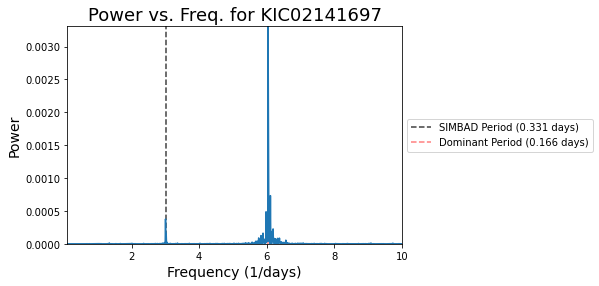

In [25]:
LS('KIC02141697_LC_all.dat','KIC02141697',.1,10,1000,1,trueP=.331)

### The dominant frequency might be off by a factor of 2 from the actual frequency because this system is a contact binary and not a planet simply transiting a star. This means that you'd observe several flux peaks/dips in the light curve over what is really only 1 true period since each star passes your view twice per cycle.

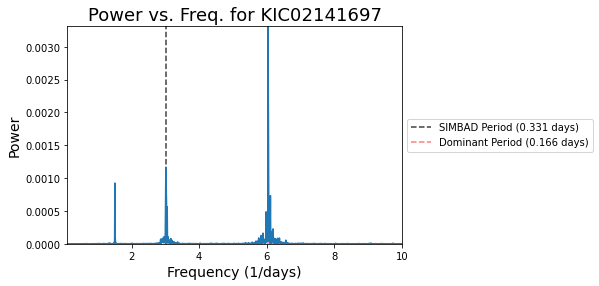

In [26]:
# Trying 2 Fourier terms instead of 1
LS('KIC02141697_LC_all.dat','KIC02141697',.1,10,1000,2,trueP=.331)

### Adding another fourier component increased the peak at the true period, but also presented another peak at a lower frequency. It didn't signifcantly help filter out the alias.

## 2c) What if the power spectrum doesn't encompass the true frequency? (How can you end up with the wrong period?)

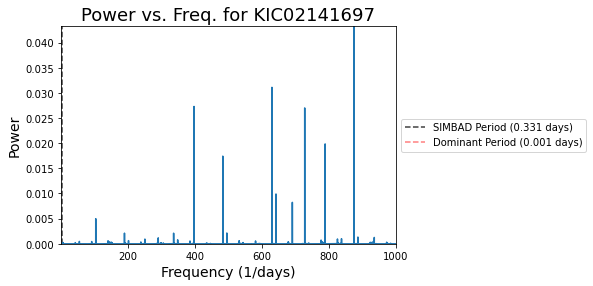

In [27]:
# Too large of a frequency range (.0001 to 1000)
LS('KIC02141697_LC_all.dat','KIC02141697',.001,10000,10000,1,trueP=.331)

### If you search too broad a frequency range, the binning is skewed and you miss where the true period is

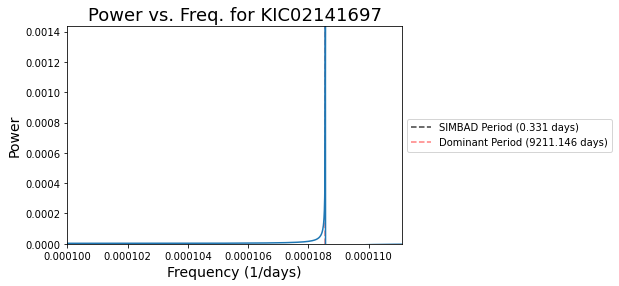

In [28]:
# Too small of a frequency range (.0001 to .0009)
LS('KIC02141697_LC_all.dat','KIC02141697',9000,10000,1000,1,trueP=.331)

### If you search too small a frequency range, you artificially select the greatest power over this interval as indicative of the period

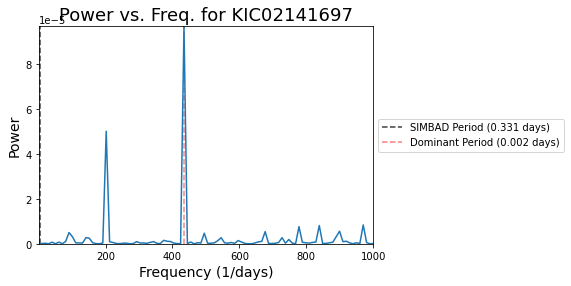

In [29]:
# Too few intervals over broad range (.01 to 1000 with 100 intervals)
LS('KIC02141697_LC_all.dat','KIC02141697',.001,100,100,1,trueP=.331)

### If you search a broad range with too few intervals over that range, the data can't be properly sparsed and you end up with a very skewed measurement of the period

## 2d) Use nterms >= 3 and describe how the resulting power spectra can lead to errors in your determination of the period 

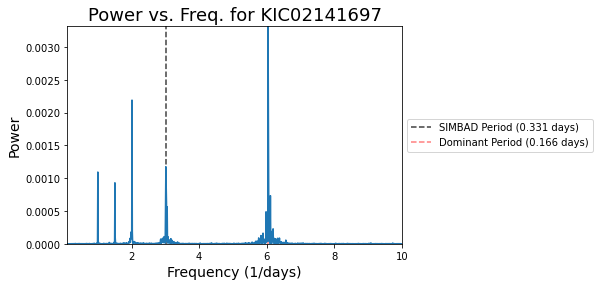

In [30]:
# Trying 3 Fourier terms
LS('KIC02141697_LC_all.dat','KIC02141697',.1,10,1000,3,trueP=.331)

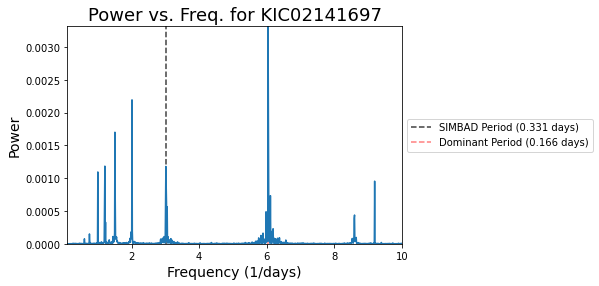

In [31]:
# Trying 5 Fourier terms
LS('KIC02141697_LC_all.dat','KIC02141697',.1,10,1000,5,trueP=.331)

### If you use too many Fourier terms, then frequencies which are not representative of the true period are given too much weight and have more power than the true period. This would lead you to adopt a period that may not simply be an alias, but wrong entirely.

## 2e) Make a phased light curve with the best-fit period. Then fold the light curve with a period of .5P and 2P to see if, when compared to the best-fit, those periods can be ruled out 

In [32]:
P_best = 0.331 # in days (from SIMBAD)

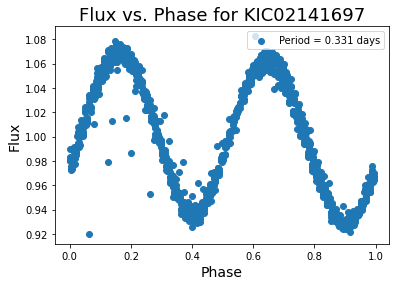

In [33]:
LightCurve('KIC02141697_LC_all.dat','KIC02141697',1000,period=P_best,plot='Phase')

### 1 full period captured!

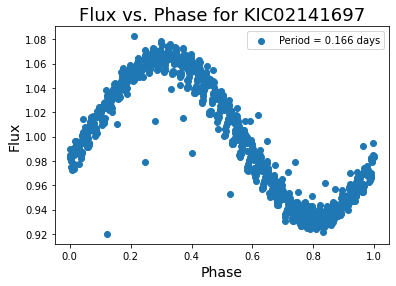

In [45]:
LightCurve('KIC02141697_LC_all.dat','KIC02141697',1000,period=P_best*.5,plot='Phase')

### Full period not captured so this must not be the true period

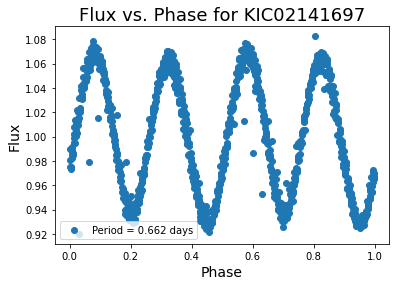

In [46]:
LightCurve('KIC02141697_LC_all.dat','KIC02141697',1000,period=P_best*2.,plot='Phase')

### Several full periods captured so this must not be the true period

## 2f) Use 100, 10, 1 day of data and show how the certainty of the period determination declines as the time baseline shrinks. What is the minimum time baseline to extract the true period for this object?

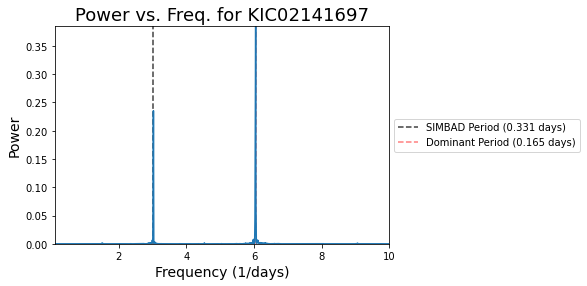

In [36]:
# Calculating periodogram for 100 days of data
LS('KIC02141697_LC_all.dat','KIC02141697',.1,10,1000,2,trueP=.331,days=100)

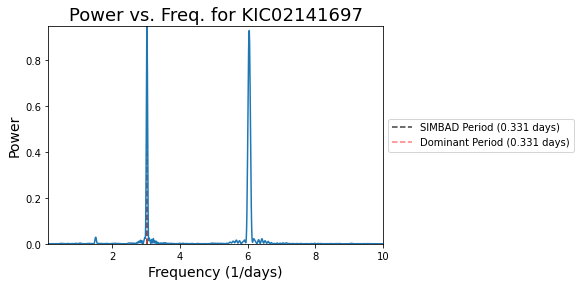

In [37]:
# Computing periodogram for 10 days of data
LS('KIC02141697_LC_all.dat','KIC02141697',.1,10,1000,2,trueP=.331,days=10)

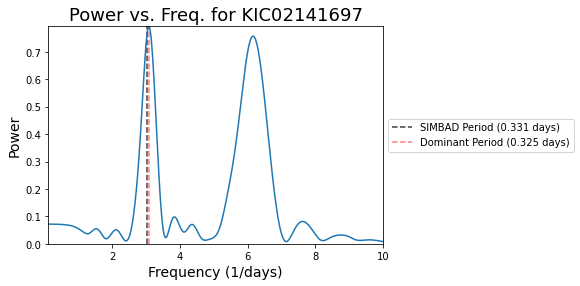

In [38]:
# Computing periodogram for 1 day of data
LS('KIC02141697_LC_all.dat','KIC02141697',.1,10,1000,2,trueP=.331,days=1)

### I would suggest 10 days as the minimum time baseline for determining the true period for this data. Any less than this and the peaks at the important frequencies are too broad to have high confidence in the period being selected.

# 3) Lomb-Scargle Analysis of Kepler-427

## 3a) Plot raw light curve of Kepler-427 (period = 10.3 days)

No handles with labels found to put in legend.


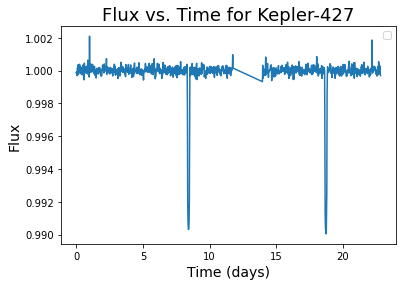

In [39]:
LightCurve('Kepler-427_LC_Q2.dat','Kepler-427',1000)

## 3b) Perform a Lomb-Scargle analysis on the light curve and locate possible periods 

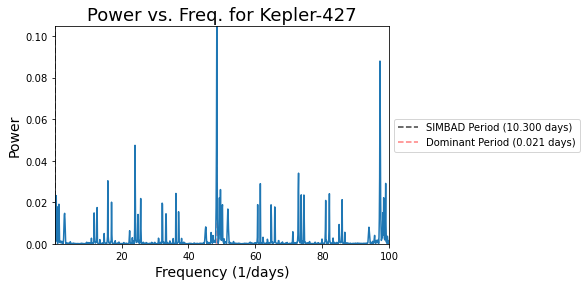

In [40]:
LS('Kepler-427_LC_Q2.dat','Kepler-427',.01,100,1000,4,trueP=10.3)

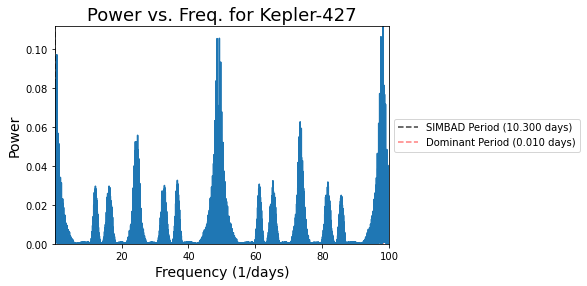

In [41]:
LS('Kepler-427_LC_Q2.dat','Kepler-427',.01,100,10000,4,trueP=10.3)

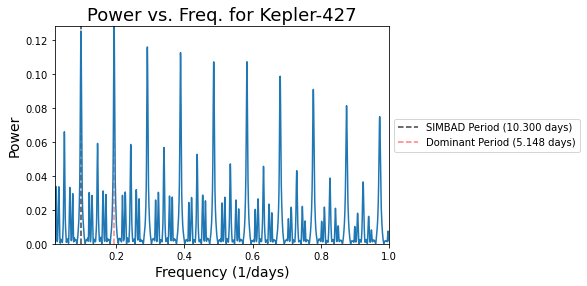

In [42]:
LS('Kepler-427_LC_Q2.dat','Kepler-427',1,50,10000,4,trueP=10.3)

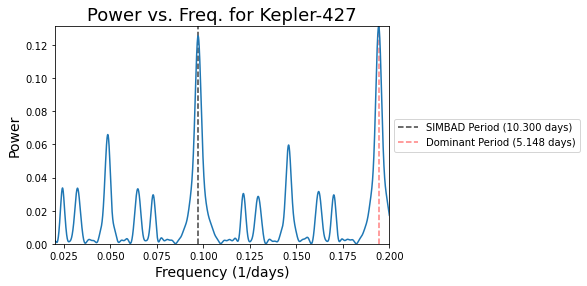

In [43]:
LS('Kepler-427_LC_Q2.dat','Kepler-427',5,50,10000,4,trueP=10.3)

### The two best periods are ~5.15 days and ~10.3 days. This is a signature of aliasing as one is almost exactly half of the other. I had to use nterms = 4 because the light curve is more complicated than a simple cosine or an even and odd cosine added together. Adding extra terms allows you to create more complex functions which allowed me to fit this particular data set.

## 3c) Fold light curve at known period and plot phased light curve. Compare to published light curves.

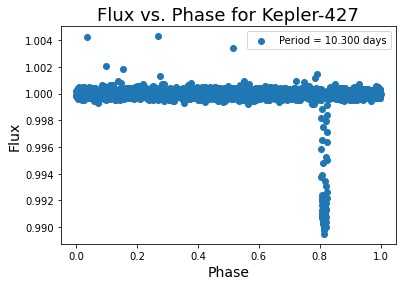

In [51]:
LightCurve('Kepler-427_LC_Q2.dat','Kepler-427',10000,period=10.3,plot='Phase')

### Real light curve on page 3 of Hebrard et al. (2018) (https://arxiv.org/pdf/1409.8554.pdf)

### My phased light curve has a similar range to the published result, but the domain is different. It appears that the published result used a different phase convention since there's becomes slightly negative. It's clear that folding the data at my chosen period yielded a clear detection though.

# 4) Radial velocity of planet-hosting star HD3651 (54 Psc)

## 4a) Plot observed radial velocity vs. time

No handles with labels found to put in legend.


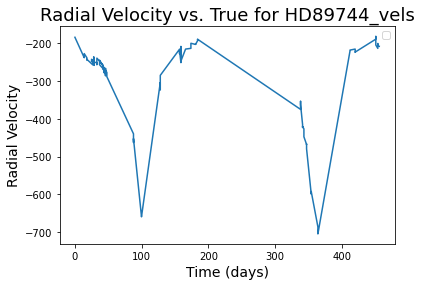

In [161]:
# Plot radial velocity curve for HD89744
times, fluxes = LightCurve('HD89744_vels.dat','HD89744_vels',numPoints=None,xaxis='Time',curve='Radial Velocity')

### Looks like period is 350<P<250 days

## 4b) Perform Lomb-Scargle analysis to determine several probable period(s) and make phased velocity curve for each (let $t_0$ be arbitrary)

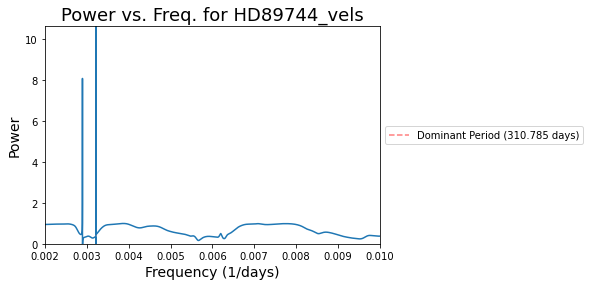

In [153]:
probable_period1 = LS('HD89744_vels.dat','HD89744_vels',100,500,20000,5)

TypeError: 'NoneType' object is not iterable

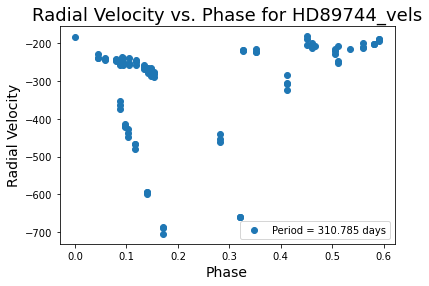

In [139]:
prob_times1, prob_velocities1, prob_errors1 = LightCurve('HD89744_vels.dat','HD89744_vels',numPoints=None,period=probable_period1,plot='Phase',curve='Radial Velocity')

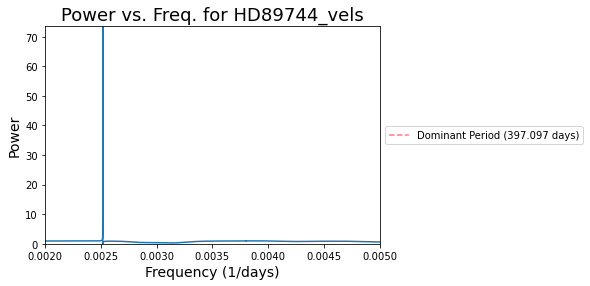

In [145]:
probable_period2 = LS('HD89744_vels.dat','HD89744_vels',200,500,20000,5)

TypeError: 'NoneType' object is not iterable

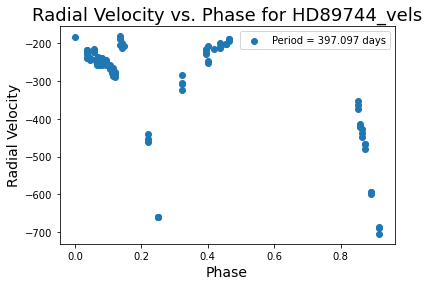

In [146]:
prob_times2, prob_velocities2, prob_errors2 = LightCurve('HD89744_vels.dat','HD89744_vels',numPoints=None,period=probable_period2,plot='Phase',curve='Radial Velocity')

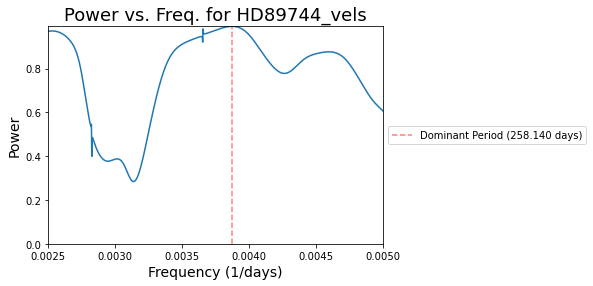

In [6]:
probable_period3 = LS('HD89744_vels.dat','HD89744_vels',200,400,1000,5)

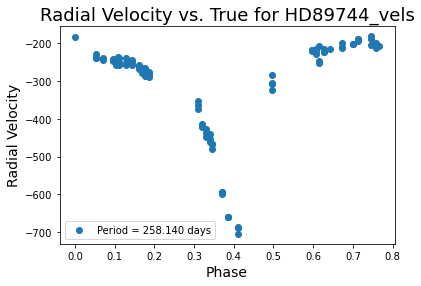

In [7]:
prob_phases3, prob_velocities3, prob_errors3 = LightCurve('HD89744_vels.dat','HD89744_vels',numPoints=None,period=probable_period3,plot=True,xaxis='Phase',curve='Radial Velocity')

### My best result is 258.14 days and the published period (https://exoplanets.nasa.gov/exoplanet-catalog/6697/hd-89744-b/) is 256.8 days so I am quite close.
### I had some trouble arriving at this because I tried a wide range (100-500 days) and got a more reasonable period than when I tried a narrower range (200-500) with the same number of points (20,000). I decided that 5 Fourier components worked best because 1-4 components was yielding a non-integer multiple of this best period.

## 4c) Determine e, $\omega$, K , and $t_0$. Then create a model radial velocity curve that matches your data and compare to published values. We're trying to fit parameters of the following equation
### <center> $v_{1r}(\theta)= K_1\left(cos(\theta+\omega)+ecos(\omega)\right)+\gamma$ </center>
### Step 1: Solve Kepler's Eqn. with iteration -> $E-esin(E)=\frac{2\pi}{P}(t-t_0)$ (guess t_0)
### Step 2: Convert E(t) to $\theta(t)$ -> $2arctan\left(\left(\frac{1+e^2}{1-e^2}\right)^{1/2}tan(\frac{E(t)}{2}\right)$ (start by guessing a value for e)
### Step 3: Calculate $v(\theta)$ and guess values for $K_1$ and $\omega$

In [8]:
# Function to numerically solve differentiable equation
# Resource that helped me: https://www.math.ubc.ca/~pwalls/math-python/roots-optimization/newton/
def NewtonRaphson(f,df,x0,precision,numSteps):
    # Inputs:
    #    f: function to evaluate
    #    df: derivative of function
    #    x0: initial guess at solution
    #    precision: answer won't exactly be 0, so set a tolerance
    #    numSteps: maximum number of times to iterate
    
    # Establish first guess at solution
    x = x0
    
    # Iterate over number of steps
    for i in range(0,numSteps):
        
        # Evaluate function
        func = f(x)
        
        # If f(x) is within precision, declare that value of x as the solution
        if abs(func) <= precision:
            #print('A solution of {0:.2e} was found in {1} iterations'.format(x,i))
            return x
        
        # If f(x) is not within precision, continue searching for solution
        elif abs(func) > precision:
            
            # Evaluate derivative
            deriv = df(x)
            
            # Adjust guess of solution by subtracting quotient of function and derivative from the last x
            x -= func/deriv

In [210]:
# Function to compute Chi Squared and reduced Chi Squared to compare models to obserations
def ChiSquared(model,observation,error,free):
    # Inputs:
    #     model = list of values from model
    #     observation = list of values from actual observations
    #     error = list of errors (sigma) for each observation
    #     free = number of free parameters in the model
    # Returns:
    #     Chi Squared and reduced Chi squared to indicate goodness of fit for the model
    
    # Initialize Chi Squared as 0
    ChiSq = 0.0
    
    # Calculate number of degrees of freedom (# of data points - free)
    nu = len(model) - free
    
    # For each data point:
    for i in range(len(model)):
        # Calculate the difference between the obsrevation and model (residual)
        residual = observation[i] - model[i]
        
        # Calculate square of quotient of residual and error value for particular data point
        term = (residual/error[i])**2
        
        # Add this term to the overall Chi Squared value
        ChiSq += term
    
    # Calculate reduced Chi Squared (just Chi Squared / # of DoF)
    RedChiSq = ChiSq/nu
    
    return(ChiSq,RedChiSq,nu)

In [10]:
P=258

# Extract time, phase, and velocity lists from LightCurve function at set period
time_list, vel_obs, errors_obs = LightCurve('HD89744_vels.dat','HD89744_vels',numPoints=None,period=P,plot=False,xaxis='Time',curve='Radial Velocity')
phase_obs, vel_obs, errors_obs = LightCurve('HD89744_vels.dat','HD89744_vels',numPoints=None,period=P,plot=False,xaxis='Phase',curve='Radial Velocity')

# Function to compare observed to modeled phased velocity curve
def Model(time_list,phase_obs,vel_obs,errors_obs,t0,P,e,K,w,gamma,plot=True):
    # Inputs:
    #     time_list = list of times (when observations were taken)
    #     phase_obs = phases corresponding to times in time_list (found with xaxis = 'Phase' from LightCurve func.)
    #     vel_obs = list of observed velocities 
    #     t0 = reference time for orbit
    #     P = guessed period of orbit
    #     e = eccentricity of orbit (0-1)
    #     K = velocity semi-amplitude (folds in a,i,e, and P)
    #     w = argument of periapsis
    #     gamma = constant in velocity equation (shifts graph up or down)
    #     plot = boolean telling the function to produce a plot (True) or not (False)
    # Returns:
    #     vel_model = velocities calculated for model
    
    # Redefine w in radians
    w *= np.pi/180
    
    # Calculate first term of E and theta relationship
    term1 = ((1+e**2)/(1-e**2))**(1/2)
    
    # Create empty lists of velocity values and residuals
    vel_model = []
    residuals = []
    
    # Calculate E at different times
    for i in range(len(time_list)):
        
        # Select particular time from list
        time = time_list[i]
        
        # Calculate mean anomaly (M) to use it as first guess for finding E
        M = 2*np.pi/P*(time-t0)
        
        # Define Kepler equation and its derivative
        f = lambda E: E - e*np.sin(E) - M
        df = lambda E: 1. - e*np.cos(E)
        
        # Use NewtonRaphson function to find E at each time
        E = NewtonRaphson(f,df,M,1e-6,1000)
        
        # Convert eccentric anomaly (E) to true anomaly (theta)
        phase = 2*np.arctan(term1*np.tan(E/2.))

        # Calculate velocity with e, theta, K, and w
        velocity = K*(np.cos(phase+w)+e*np.cos(w))+gamma
        vel_model.append(velocity)
        
    if plot == True:
        # Plot observed vs. modeled phase velocity curve
        fig = plt.figure()
        ax = plt.subplot(111)
        ax.scatter(phase_obs,vel_obs,color='blue',label='Observation')
        ax.scatter(phase_obs,vel_model,color='r',marker='s',label='Model')
        ax.set_xlabel('Phase',fontsize=14)
        ax.set_ylabel('Radial Velocity',fontsize=14)
        ax.set_title('Fitting Model to HD89744',fontsize=18)
        ax.legend()
    
    return(vel_model)

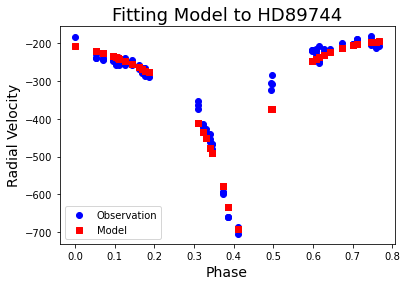

In [250]:
# Set fixed parameters in Kepler's equation
t0 = 107. # in days
P = 258. # in days
e = 0.7

# Set parameters in velocity equation
K = 250
w = 190
gamma = -270

# Plot observations vs. model for best set of parameters
vel_model = Model(time_list,phase_obs,vel_obs,errors_obs,107.0,P,e,K,w,gamma,plot=True)

### Best model results: $P=258$ days, $e=0.70$, $\omega=190^{\circ}$, $K=250$ m/s, $t_0=107$ days, $\gamma=-270$ m/s
### Published model used: $P=256.78$ days, $e=0.689$, $\omega=194^{\circ}$, $K=263$ m/s, $t_0=107.1$ days
Wittenmyer et al., 2009 (https://arxiv.org/pdf/0706.1962.pdf)
### One difficulty I had, which was of my own creation, is that I was initially plotting the model velocity vs. the true anomaly ($\theta$) instead of vs. the phased time values from the data itself. This caused my model to not line up at all in the beginning.
### For estimating K, I estimated what the semi-amplitude was of the raw light curve which was a helpful first guess. For e, I started with 0.5 since it ranges from 0 to 1 and was pretty quickly able to see what a good value would be. I took a similar approach for $t_0$ because I knew it had to be somewhere between 0 and 500 days so I made the model vs. observation graph for 10 $t_0$ values over this interval and was able to visually converge on a good value. For the period, my first guess was that derived from the periodogram so I only had to minorly tweak it to improve the model fit. My $\omega$ value is clearly very different from the published results, but after adjusting it, 10 degrees seemed to fit best. The paper did not list a $\gamma$ value so I chose one that best fit my data. 

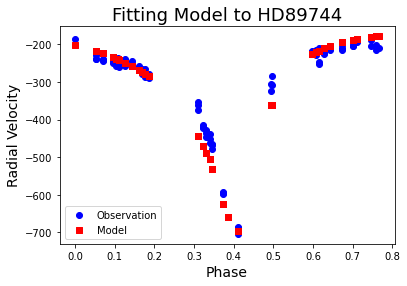

In [61]:
# Using best parameters from paper
vel_published = Model(time_list,phase_obs,vel_obs,errors_obs,107.1,256.78,.689,264,194,gamma=-265,plot=True)

## 4d) Compute $\chi^2$ and $\tilde{\chi}^2$ (reduced chi-squared) for the best-fitting model from 4c. Interpolate the model at the phases of your data to calculate the residuals from the best-fitting model.

In [211]:
# Calculate (reduced) chi squared for HD89744
ChiSq, RedChiSq, degrees = ChiSquared(vel_model,vel_obs, errors_obs,6)
print(ChiSq,RedChiSq,degrees)

6202.342708322537 70.48116714002883 88


### According to this table from NIST (https://www.itl.nist.gov/div898/handbook/eda/section3/eda3674.htm), if the number of degrees of freedom is 88, then the probability less than the critical value is between 0.10 and 0.05. There may be other factors in the star-planet system itself that lead to such a high $\tilde{\chi}^2$. The provided errors may be too small if the surface of the star isn't uniform (star spots) or if the star is pulsating. Also, if another body is present, then this would affect what the errors should be too. The same team detected a second planet around HD89744 with a longer period (https://arxiv.org/abs/1901.08471).

## 4e) Use scipy.optimize.curve_fit or lmfit to obtain best parameters and report $\tilde{\chi}^2$. Use table of $\tilde{\chi}^2$ probabilities to give a probability of obtaining such a $\tilde{\chi}^2$ by chance and discuss if the model is a good fit to the data.
### lmfit: https://github.com/lmfit/lmfit-py/blob/master/README.rst

In [83]:
from lmfit import minimize, Parameters

# Function to compare observed to modeled phased velocity curve
def ModelNew(params,time_list,phase_obs,vel_obs,errors_obs,plot=False):
    # Inputs:
    #     time_list = list of times (when observations were taken)
    #     phase_obs = phases corresponding to times in time_list (found with xaxis = 'Phase' from LightCurve func.)
    #     vel_obs = list of observed velocities 
    #     t0 = reference time for orbit
    #     P = guessed period of orbit
    #     e = eccentricity of orbit (0-1)
    #     K = velocity semi-amplitude (folds in a,i,e, and P)
    #     w = argument of periapsis
    #     gamma = constant in velocity equation (shifts graph up or down)
    #     plot = boolean telling the function to produce a plot (True) or not (False)
    # Returns:
    #     vel_model = velocities calculated for model
    
    # Extract parameters from params object
    t0 = params['t0']
    P = params['P']
    e = params['e']
    K = params['K']
    w = params['w']
    gamma = params['gamma']
    
    # Redefine w in radians
    w *= np.pi/180
    
    # Calculate first term of E and theta relationship
    term1 = ((1+e**2)/(1-e**2))**(1/2)
    
    # Create empty lists of velocity values and residuals
    vel_model = []
    residuals = []
    
    # Calculate E at different times
    for i in range(len(time_list)):
        
        # Select particular time from list
        time = time_list[i]
        
        # Calculate mean anomaly (M) to use it as first guess for finding E
        M = 2*np.pi/P*(time-t0)
        
        # Define Kepler equation and its derivative
        f = lambda E: E - e*np.sin(E) - M
        df = lambda E: 1. - e*np.cos(E)
        
        # Use NewtonRaphson function to find E at each time
        E = NewtonRaphson(f,df,M,1e-6,1000)
        
        # Convert eccentric anomaly (E) to true anomaly (theta)
        phase = 2*np.arctan(term1*np.tan(E/2.))

        # Calculate velocity with e, theta, K, and w
        velocity = K*(np.cos(phase+w)+e*np.cos(w))+gamma
        vel_model.append(velocity)
        
        residuals.append(vel_obs[i]-velocity/errors_obs[i])
        
    if plot == True:
        # Plot observed vs. modeled phase velocity curve
        fig = plt.figure()
        ax = plt.subplot(111)
        ax.scatter(phase_obs,vel_obs,color='blue',label='Observation')
        ax.scatter(phase_obs,vel_model,color='r',marker='s',label='Model')
        ax.set_xlabel('Phase',fontsize=14)
        ax.set_ylabel('Radial Velocity',fontsize=14)
        ax.set_title('Fitting Model to HD89744',fontsize=18)
        ax.legend()
    
    return(residuals)

# Set parameters for ModelNew function
params = Parameters()
params.add('t0',value=107.0,min=0.01,max=500.)
params.add('P',value=258.0,min=0.01,max=500.)
params.add('e',value=0.70,min=0.01,max=0.999)
params.add('K',value=250.0)
params.add('w',value=190.0,min=0.01,max=360.0)
params.add('gamma',value=-265)

# Print results
results = minimize(ModelNew, params, args=(time_list,phase_obs,vel_obs,errors_obs))
print('Best t0 value = {0:.2f} days'.format(results.params['t0'].value))
print('Best P value = {0:.2f} days'.format(results.params['P'].value))
print('Best e value = {0:.2f}'.format(results.params['e'].value))
print('Best K value = {0:.5f} m/s'.format(results.params['K'].value))
print('Best w value = {0:.2f} deg'.format(results.params['w'].value))
print('Best gamma value = {0:.2f}'.format(results.params['gamma'].value))
print('Chi Squared = {0:.2f}'.format(results.chisqr))
print('Reduced Chi Squared = {0:.2f}'.format(results.redchi))

Best t0 value = 111.99 days
Best P value = 259.07 days
Best e value = 0.77
Best K value = 875.93663 m/s
Best w value = 200.30 deg
Best gamma value = -652.60
Chi Squared = 237289.07
Reduced Chi Squared = 2696.47


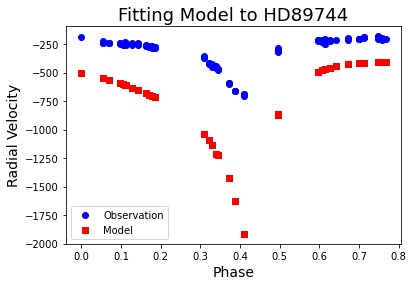

In [79]:
# Plot parameters yielded from lmfit (not a good fit and parameters are much different than the published ones)
lmfit_result = Model(time_list,phase_obs,vel_obs,errors_obs,111.99,259.07,.77,875.94,200.30,gamma=-652.6,plot=True)

In [85]:
# Trying scipy.optimize.curve_fit instead
from scipy.optimize import curve_fit

# Function to calculate model velocities
def ModelScipy(time_list,t0,P,e,K,w,gamma):
    
    # Redefine w in radians
    w *= np.pi/180
    
    # Calculate first term of E and theta relationship
    term1 = ((1+e**2)/(1-e**2))**(1/2)
    
    # Create empty lists of velocity values and residuals
    vel_model = []
    
    # Calculate E at different times
    for i in range(len(time_list)):

        # Select particular time from list
        time = time_list[i]

        # Calculate mean anomaly (M) to use it as first guess for finding E
        M = 2*np.pi/P*(time-t0)

        # Define Kepler equation and its derivative
        f = lambda E: E - e*np.sin(E) - M
        df = lambda E: 1. - e*np.cos(E)

        # Use NewtonRaphson function to find E at each time
        E = NewtonRaphson(f,df,M,1e-6,1000)

        # Convert eccentric anomaly (E) to true anomaly (theta)
        phase = 2*np.arctan(term1*np.tan(E/2.))

        # Calculate velocity with e, theta, K, and w
        velocity = K*(np.cos(phase+w)+e*np.cos(w))+gamma
        vel_model.append(velocity)
        
    return(vel_model)

# Set initial parameter guesses in Kepler's equation
t0 = 107. # in days
P = 258. # in days
e = 0.7

# Set initial parameter guesses in velocity equation
K = 250.0
w = 190
gamma = -270.0

# Calculate model velocitites with initial parameters
y = ModelScipy(time_list,t0,P,e,K,w,gamma)

# Choose bounds for parameters
ranges = ((5.0,1.0,0.01,1.0,0.01,-np.inf),(200.0,400.0,0.999,600,360.0,np.inf))

# Optimize fit
popt, pcov = curve_fit(ModelScipy,time_list,y,sigma=errors_obs,bounds=ranges)
print('Best t0 value = {0:.2f} days'.format(popt[0]))
print('Best P value = {0:.2f} days'.format(popt[1]))
print('Best e value = {0:.2f}'.format(popt[2]))
print('Best K value = {0:.5f} m/s'.format(popt[3]))
print('Best w value = {0:.2f} deg'.format(popt[4]))

Best t0 value = 107.00 days
Best P value = 258.00 days
Best e value = 0.70
Best K value = 250.00000 m/s
Best w value = 190.00 deg


### These parameters from scipy.optimize.curve_fit are the ones that I gave it so I wasn't able to get it working properly. I've spent quite a lot of time trying to get these optimizers to give me better results, but to no avail so I'm electing to finish the homework here given how many total hours I've already spent on it.